In [20]:
# hide code cells
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')

# Result assessment

In [21]:
# Import library to use
# Set figure to display inside notebook
%matplotlib inline
#### 
import numpy as np
from pandas import *
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import *
import matplotlib.pylab as pylab
import scipy.stats as td

## Throughput

In [22]:
dtresult = pd.read_csv('data/bw16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
dtdata = dtresult[range(1,17)]
dtindex = dtresult[0]
dtdata.index = dtindex.str.replace('T[0-2][0-9]', '',case=False)

# To calculate the average throughput, we first calculate average throughput each thread has in one test,
# then again take the average of 5 tests
avgtpin1test = dtdata.T.mean() # Average throughput of each thread/VM in one test
avgtpin5tests = avgtpin1test.groupby(level=0).mean() # Average throughput of each thread/VM in 5 tests
avgtpin5tests = avgtpin5tests / 1024 # Converting to Megabytes/second

# Putting average throughput per thread/VM to vector before plotting
bwsrbf = avgtpin5tests.filter(regex="^SRBF32CTH").tolist()
bwswbf = avgtpin5tests.filter(regex="^SWBF32CTH").tolist()

bwsrsvm1c = avgtpin5tests.filter(regex="^SR01VM01CTH").tolist()
bwswsvm1c = avgtpin5tests.filter(regex="^SW01VM01CTH").tolist()
bwsrsvm2c = avgtpin5tests.filter(regex="^SR01VM02CTH").tolist()
bwswsvm2c = avgtpin5tests.filter(regex="^SW01VM02CTH").tolist()
bwsrsvm4c = avgtpin5tests.filter(regex="^SR01VM04CTH").tolist()
bwswsvm4c = avgtpin5tests.filter(regex="^SW01VM04CTH").tolist()
bwsrsvm8c = avgtpin5tests.filter(regex="^SR01VM08CTH").tolist()
bwswsvm8c = avgtpin5tests.filter(regex="^SW01VM08CTH").tolist()
bwsrsvm16c = avgtpin5tests.filter(regex="^SR01VM16CTH").tolist()
bwswsvm16c = avgtpin5tests.filter(regex="^SW01VM16CTH").tolist()

bwsrmvm = avgtpin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
bwswmvm = avgtpin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()

# Calculate aggregated throughput on each host of each test, then taking the average
aggtpin1test = dtdata.T.sum() # Aggregate throughput on each host in one test
avgaggtpintestgrouped = aggtpin1test.groupby(level=0)
avgaggtpin5tests = avgaggtpintestgrouped.mean() # Then calculate the average of the total throughput through 5 tests
avgaggtpin5tests = avgaggtpin5tests / 1024 # Convert to MB/s
ciaggtpin5tests = avgaggtpintestgrouped.aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # CI of 95%
ciaggtpin5tests = ciaggtpin5tests / 1024 # Convert to same scale with mean

# Putting average aggregate throughput to vector before plotting
aggbwsrbf = avgaggtpin5tests.filter(regex="^SRBF32CTH").tolist()
aggbwswbf = avgaggtpin5tests.filter(regex="^SWBF32CTH").tolist()
aggbwsrsvm1c = avgaggtpin5tests.filter(regex="^SR01VM01CTH").tolist()
aggbwswsvm1c = avgaggtpin5tests.filter(regex="^SW01VM01CTH").tolist()
aggbwsrsvm2c = avgaggtpin5tests.filter(regex="^SR01VM02CTH").tolist()
aggbwswsvm2c = avgaggtpin5tests.filter(regex="^SW01VM02CTH").tolist()
aggbwsrsvm4c = avgaggtpin5tests.filter(regex="^SR01VM04CTH").tolist()
aggbwswsvm4c = avgaggtpin5tests.filter(regex="^SW01VM04CTH").tolist()
aggbwsrsvm8c = avgaggtpin5tests.filter(regex="^SR01VM08CTH").tolist()
aggbwswsvm8c = avgaggtpin5tests.filter(regex="^SW01VM08CTH").tolist()
aggbwsrsvm16c = avgaggtpin5tests.filter(regex="^SR01VM16CTH").tolist()
aggbwswsvm16c = avgaggtpin5tests.filter(regex="^SW01VM16CTH").tolist()
aggbwsrmvm = avgaggtpin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
aggbwswmvm = avgaggtpin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()

# Confidence Interval
ciaggbwsrbf = ciaggtpin5tests.filter(regex="^SRBF32CTH").tolist()
ciaggbwswbf = ciaggtpin5tests.filter(regex="^SWBF32CTH").tolist()
ciaggbwsrsvm1c = ciaggtpin5tests.filter(regex="^SR01VM01CTH").tolist()
ciaggbwswsvm1c = ciaggtpin5tests.filter(regex="^SW01VM01CTH").tolist()
ciaggbwsrsvm2c = ciaggtpin5tests.filter(regex="^SR01VM02CTH").tolist()
ciaggbwswsvm2c = ciaggtpin5tests.filter(regex="^SW01VM02CTH").tolist()
ciaggbwsrsvm4c = ciaggtpin5tests.filter(regex="^SR01VM04CTH").tolist()
ciaggbwswsvm4c = ciaggtpin5tests.filter(regex="^SW01VM04CTH").tolist()
ciaggbwsrsvm8c = ciaggtpin5tests.filter(regex="^SR01VM08CTH").tolist()
ciaggbwswsvm8c = ciaggtpin5tests.filter(regex="^SW01VM08CTH").tolist()
ciaggbwsrsvm16c = ciaggtpin5tests.filter(regex="^SR01VM16CTH").tolist()
ciaggbwswsvm16c = ciaggtpin5tests.filter(regex="^SW01VM16CTH").tolist()
ciaggbwsrmvm = ciaggtpin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
ciaggbwswmvm = ciaggtpin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()

# =================================================================================
# Disk Utilization From Host's Perspective
duhostresult = pd.read_csv('data/duhost16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
duhostdata = duhostresult[range(1,2)]
duhostindex = duhostresult[0]
duhostdata.index = duhostindex.str.replace('T[0-2][0-9]', '',case=False)

duhostdata = duhostdata.T.sum() # just convert to list
avgduhost = duhostdata.groupby(level=0).mean() # Average of disk utilization 
ciduhost = duhostdata.groupby(level=0).aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # CI of 95%

# Putting average throughput per thread/VM to vector before plotting
duhostsrbf = avgduhost.filter(regex="^SRBF32CTH").tolist()
duhostswbf = avgduhost.filter(regex="^SWBF32CTH").tolist()

duhostsrsvm1c = avgduhost.filter(regex="^SR01VM01CTH").tolist()
duhostswsvm1c = avgduhost.filter(regex="^SW01VM01CTH").tolist()
duhostsrsvm2c = avgduhost.filter(regex="^SR01VM02CTH").tolist()
duhostswsvm2c = avgduhost.filter(regex="^SW01VM02CTH").tolist()
duhostsrsvm4c = avgduhost.filter(regex="^SR01VM04CTH").tolist()
duhostswsvm4c = avgduhost.filter(regex="^SW01VM04CTH").tolist()
duhostsrsvm8c = avgduhost.filter(regex="^SR01VM08CTH").tolist()
duhostswsvm8c = avgduhost.filter(regex="^SW01VM08CTH").tolist()
duhostsrsvm16c = avgduhost.filter(regex="^SR01VM16CTH").tolist()
duhostswsvm16c = avgduhost.filter(regex="^SW01VM16CTH").tolist()

duhostsrmvm = avgduhost.filter(regex="^SR[0-9]+VM01CTH01").tolist()
duhostswmvm = avgduhost.filter(regex="^SW[0-9]+VM01CTH01").tolist()

# Confidence Interval
ciduhostsrbf = ciduhost.filter(regex="^SRBF32CTH").tolist()
ciduhostswbf = ciduhost.filter(regex="^SWBF32CTH").tolist()
ciduhostsrsvm1c = ciduhost.filter(regex="^SR01VM01CTH").tolist()
ciduhostswsvm1c = ciduhost.filter(regex="^SW01VM01CTH").tolist()
ciduhostsrsvm2c = ciduhost.filter(regex="^SR01VM02CTH").tolist()
ciduhostswsvm2c = ciduhost.filter(regex="^SW01VM02CTH").tolist()
ciduhostsrsvm4c = ciduhost.filter(regex="^SR01VM04CTH").tolist()
ciduhostswsvm4c = ciduhost.filter(regex="^SW01VM04CTH").tolist()
ciduhostsrsvm8c = ciduhost.filter(regex="^SR01VM08CTH").tolist()
ciduhostswsvm8c = ciduhost.filter(regex="^SW01VM08CTH").tolist()
ciduhostsrsvm16c = ciduhost.filter(regex="^SR01VM16CTH").tolist()
ciduhostswsvm16c = ciduhost.filter(regex="^SW01VM16CTH").tolist()
ciduhostsrmvm = ciduhost.filter(regex="^SR[0-9]+VM01CTH01").tolist()
ciduhostswmvm = ciduhost.filter(regex="^SW[0-9]+VM01CTH01").tolist()

# =================================================================================
# CPU Utilization From Host's Perspective (measure CPU usage of VM during test)
cpuhostresult = pd.read_csv('data/cpuhost16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
cpuhostdata = cpuhostresult[range(1,2)]
cpuhostindex = cpuhostresult[0]
cpuhostdata.index = cpuhostindex.str.replace('T[0-2][0-9]', '',case=False)

cpuhostdata = cpuhostdata.T.sum() # just convert to list
avgcpuhost = cpuhostdata.groupby(level=0).mean() # Average of disk utilization 
cicpuhost = cpuhostdata.groupby(level=0).aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # CI of 95%

# Putting average throughput per thread/VM to vector before plotting
cpuhostsrbf = avgcpuhost.filter(regex="^SRBF32CTH").tolist()
cpuhostsrbf = [x/32 for x in cpuhostsrbf] #Bare metal have 32 cores
cpuhostswbf = avgcpuhost.filter(regex="^SWBF32CTH").tolist()
cpuhostswbf = [x/32 for x in cpuhostswbf] #Bare metal have 32 cores

cpuhostsrsvm1c = avgcpuhost.filter(regex="^SR01VM01CTH").tolist()
cpuhostsrsvm1c = [x/1 for x in cpuhostsrsvm1c] 
cpuhostswsvm1c = avgcpuhost.filter(regex="^SW01VM01CTH").tolist()
cpuhostswsvm1c = [x/1 for x in cpuhostsrsvm1c]
cpuhostsrsvm2c = avgcpuhost.filter(regex="^SR01VM02CTH").tolist()
cpuhostsrsvm2c = [x/2 for x in cpuhostsrsvm2c]
cpuhostswsvm2c = avgcpuhost.filter(regex="^SW01VM02CTH").tolist()
cpuhostswsvm2c = [x/2 for x in cpuhostsrsvm2c]
cpuhostsrsvm4c = avgcpuhost.filter(regex="^SR01VM04CTH").tolist()
cpuhostsrsvm4c = [x/4 for x in cpuhostsrsvm4c] 
cpuhostswsvm4c = avgcpuhost.filter(regex="^SW01VM04CTH").tolist()
cpuhostswsvm4c = [x/4 for x in cpuhostsrsvm4c]
cpuhostsrsvm8c = avgcpuhost.filter(regex="^SR01VM08CTH").tolist()
cpuhostsrsvm8c = [x/8 for x in cpuhostsrsvm8c]
cpuhostswsvm8c = avgcpuhost.filter(regex="^SW01VM08CTH").tolist()
cpuhostswsvm8c = [x/8 for x in cpuhostsrsvm8c]
cpuhostsrsvm16c = avgcpuhost.filter(regex="^SR01VM16CTH").tolist()
cpuhostsrsvm16c = [x/16 for x in cpuhostsrsvm16c]
cpuhostswsvm16c = avgcpuhost.filter(regex="^SW01VM16CTH").tolist()
cpuhostswsvm16c = [x/16 for x in cpuhostsrsvm16c]

cpuhostsrmvm = avgcpuhost.filter(regex="^SR[0-9]+VM01CTH01").tolist()
cpuhostsrmvm = [x/16 for x in cpuhostsrmvm]
cpuhostswmvm = avgcpuhost.filter(regex="^SW[0-9]+VM01CTH01").tolist()
cpuhostswmvm = [x/16 for x in cpuhostswmvm]

# Confidence Interval
cicpuhostsrbf = cicpuhost.filter(regex="^SRBF32CTH").tolist()
cicpuhostsrbf = [x/32 for x in cicpuhostsrbf] #Bare metal have 32 cores
cicpuhostswbf = cicpuhost.filter(regex="^SWBF32CTH").tolist()
cicpuhostswbf = [x/32 for x in cicpuhostswbf] #Bare metal have 32 cores

cicpuhostsrsvm1c = cicpuhost.filter(regex="^SR01VM01CTH").tolist()
cicpuhostsrsvm1c = [x/1 for x in cicpuhostsrsvm1c]
cicpuhostswsvm1c = cicpuhost.filter(regex="^SW01VM01CTH").tolist()
cicpuhostswsvm1c = [x/1 for x in cicpuhostsrsvm1c]
cicpuhostsrsvm2c = cicpuhost.filter(regex="^SR01VM02CTH").tolist()
cicpuhostsrsvm2c = [x/2 for x in cicpuhostsrsvm2c]
cicpuhostswsvm2c = cicpuhost.filter(regex="^SW01VM02CTH").tolist()
cicpuhostswsvm2c = [x/2 for x in cicpuhostsrsvm2c]
cicpuhostsrsvm4c = cicpuhost.filter(regex="^SR01VM04CTH").tolist()
cicpuhostsrsvm4c = [x/4 for x in cicpuhostsrsvm4c]
cicpuhostswsvm4c = cicpuhost.filter(regex="^SW01VM04CTH").tolist()
cicpuhostswsvm4c = [x/4 for x in cicpuhostsrsvm4c]
cicpuhostsrsvm8c = cicpuhost.filter(regex="^SR01VM08CTH").tolist()
cicpuhostsrsvm8c = [x/8 for x in cicpuhostsrsvm8c]
cicpuhostswsvm8c = cicpuhost.filter(regex="^SW01VM08CTH").tolist()
cicpuhostswsvm8c = [x/8 for x in cicpuhostsrsvm8c]
cicpuhostsrsvm16c = cicpuhost.filter(regex="^SR01VM16CTH").tolist()
cicpuhostsrsvm16c = [x/16 for x in cicpuhostsrsvm16c]
cicpuhostswsvm16c = cicpuhost.filter(regex="^SW01VM16CTH").tolist()
cicpuhostswsvm16c = [x/16 for x in cicpuhostsrsvm16c]

cicpuhostsrmvm = cicpuhost.filter(regex="^SR[0-9]+VM01CTH01").tolist()
cicpuhostsrmvm = [x/16 for x in cicpuhostsrmvm]
cicpuhostswmvm = cicpuhost.filter(regex="^SW[0-9]+VM01CTH01").tolist()
cicpuhostswmvm = [x/16 for x in cicpuhostswmvm]

In [23]:
# Remove percentage symbol in csv file first
!sed -i 's/%//g' data/cpuus16p4gbf12cache_deadline_sync.csv
!sed -i 's/%//g' data/cpuks16p4gbf12cache_deadline_sync.csv
# Load time spending in user space
cpuusresult = pd.read_csv('data/cpuus16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
cpuusdata = cpuusresult[range(1,17)]
cpuusindex = cpuusresult[0]
cpuusdata.index = cpuusindex.str.replace('T[0-2][0-9]', '',case=False)
# Load time spending in kernel space
cpuksresult = pd.read_csv('data/cpuks16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
cpuksdata = cpuksresult[range(1,17)]
cpuksindex = cpuksresult[0]
cpuksdata.index = cpuksindex.str.replace('T[0-2][0-9]', '',case=False)

# Calculate CPU utilisation from the thread view point
totalcpupercentage = cpuusdata + cpuksdata
sumcpufio = totalcpupercentage.T.sum()
sumcpufiogrouped = sumcpufio.groupby(level=0) 
avgcpufio = sumcpufiogrouped.mean() # Mean of each thread/VM on 5 tests
cicpufio = sumcpufiogrouped.aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # Confident interval of 95%

# CPU serving time
cpufiosrbf = avgcpufio.filter(regex="^SRBF32CTH").tolist()
cpufiosrbf = [x/32 for x in cpufiosrbf]
cpufioswbf = avgcpufio.filter(regex="^SWBF32CTH").tolist()
cpufioswbf = [x/32 for x in cpufioswbf]

cpufiosrsvm1c = avgcpufio.filter(regex="^SR01VM01CTH").tolist()
cpufiosrsvm1c = [x/1 for x in cpufiosrsvm1c]
cpufioswsvm1c = avgcpufio.filter(regex="^SW01VM01CTH").tolist()
cpufioswsvm1c = [x/1 for x in cpufioswsvm1c]
cpufiosrsvm2c = avgcpufio.filter(regex="^SR01VM02CTH").tolist()
cpufiosrsvm2c = [x/2 for x in cpufiosrsvm2c]
cpufioswsvm2c = avgcpufio.filter(regex="^SW01VM02CTH").tolist()
cpufioswsvm2c = [x/2 for x in cpufioswsvm2c]
cpufiosrsvm4c = avgcpufio.filter(regex="^SR01VM04CTH").tolist()
cpufiosrsvm4c = [x/4 for x in cpufiosrsvm4c]
cpufioswsvm4c = avgcpufio.filter(regex="^SW01VM04CTH").tolist()
cpufioswsvm4c = [x/4 for x in cpufioswsvm4c]
cpufiosrsvm8c = avgcpufio.filter(regex="^SR01VM08CTH").tolist()
cpufiosrsvm8c = [x/8 for x in cpufiosrsvm8c]
cpufioswsvm8c = avgcpufio.filter(regex="^SW01VM08CTH").tolist()
cpufioswsvm8c = [x/8 for x in cpufioswsvm8c]
cpufiosrsvm16c = avgcpufio.filter(regex="^SR01VM16CTH").tolist()
cpufiosrsvm16c = [x/16 for x in cpufiosrsvm16c]
cpufioswsvm16c = avgcpufio.filter(regex="^SW01VM16CTH").tolist()
cpufioswsvm16c = [x/16 for x in cpufioswsvm16c]

cpufiosrmvm = avgcpufio.filter(regex="^SR[0-9]+VM01CTH01").tolist()
cpufiosrmvm = [x/16 for x in cpufiosrmvm]
cpufioswmvm = avgcpufio.filter(regex="^SW[0-9]+VM01CTH01").tolist()
cpufioswmvm = [x/16 for x in cpufioswmvm]


# Confident interval
cicpufiosrbf = cicpufio.filter(regex="^SRBF32CTH").tolist()
cicpufiosrbf = [x/32 for x in cicpufiosrbf]
cicpufioswbf = cicpufio.filter(regex="^SWBF32CTH").tolist()
cicpufioswbf = [x/32 for x in cicpufioswbf]

cicpufiosrsvm1c = cicpufio.filter(regex="^SR01VM01CTH").tolist()
cicpufiosrsvm1c = [x/1 for x in cicpufiosrsvm1c]
cicpufioswsvm1c = cicpufio.filter(regex="^SW01VM01CTH").tolist()
cicpufioswsvm1c = [x/1 for x in cicpufioswsvm1c]
cicpufiosrsvm2c = cicpufio.filter(regex="^SR01VM02CTH").tolist()
cicpufiosrsvm2c = [x/2 for x in cicpufiosrsvm2c]
cicpufioswsvm2c = cicpufio.filter(regex="^SW01VM02CTH").tolist()
cicpufioswsvm2c = [x/2 for x in cicpufioswsvm2c]
cicpufiosrsvm4c = cicpufio.filter(regex="^SR01VM04CTH").tolist()
cicpufiosrsvm4c = [x/4 for x in cicpufiosrsvm4c]
cicpufioswsvm4c = cicpufio.filter(regex="^SW01VM04CTH").tolist()
cicpufioswsvm4c = [x/4 for x in cicpufioswsvm4c]
cicpufiosrsvm8c = cicpufio.filter(regex="^SR01VM08CTH").tolist()
cicpufiosrsvm8c = [x/8 for x in cicpufiosrsvm8c]
cicpufioswsvm8c = cicpufio.filter(regex="^SW01VM08CTH").tolist()
cicpufioswsvm8c = [x/8 for x in cicpufioswsvm8c]
cicpufiosrsvm16c = cicpufio.filter(regex="^SR01VM16CTH").tolist()
cicpufiosrsvm16c = [x/16 for x in cicpufiosrsvm16c]
cicpufioswsvm16c = cicpufio.filter(regex="^SW01VM16CTH").tolist()
cicpufioswsvm16c = [x/16 for x in cicpufioswsvm16c]

cicpufiosrmvm = cicpufio.filter(regex="^SR[0-9]+VM01CTH01").tolist()
cicpufiosrmvm = [x/16 for x in cicpufiosrmvm]
cicpufioswmvm = cicpufio.filter(regex="^SW[0-9]+VM01CTH01").tolist()
cicpufioswmvm = [x/16 for x in cicpufioswmvm]

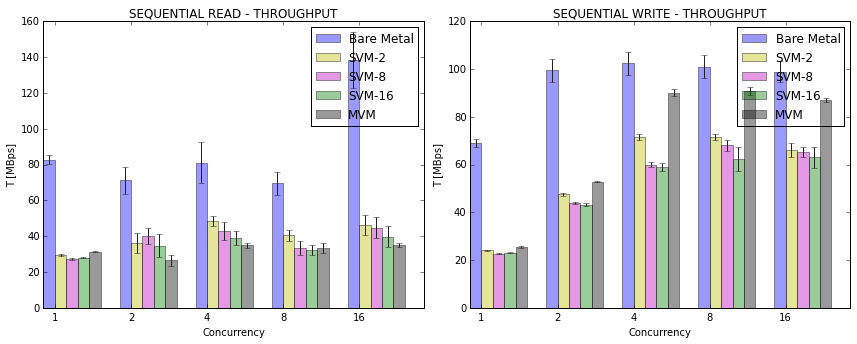

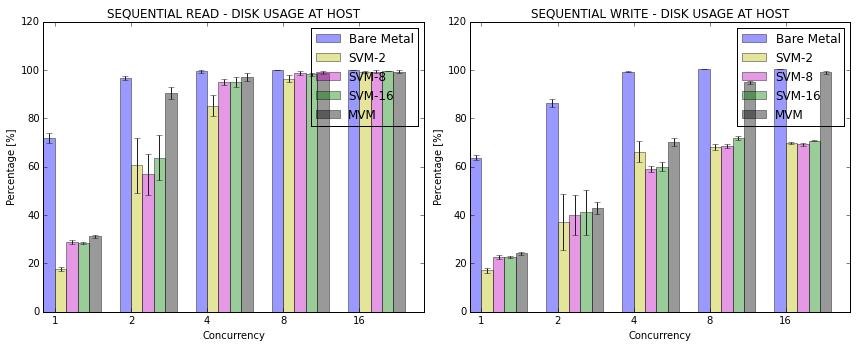

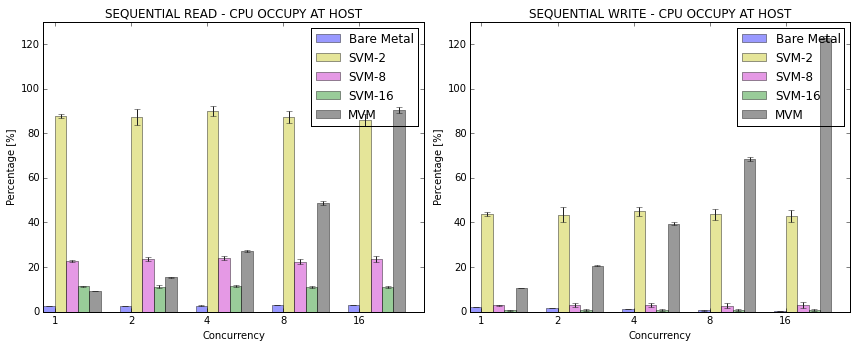

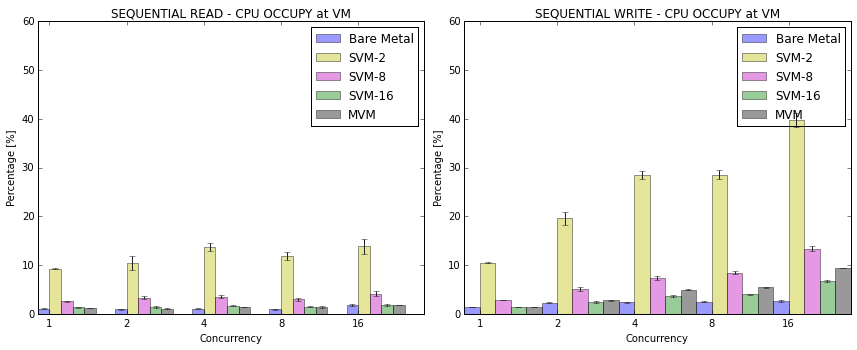

In [24]:
''' PM test '''
pylab.rcParams['figure.figsize'] = 12, 18  # change default size of figures
fig, ax = plt.subplots()

#plt.subplot(321)
#index = np.arange(5)
#bar_width = 0.5
#opacity = 0.4
#error_config = {'ecolor': '0.13'}

#rects1 = plt.bar(index, aggbwsrbf, bar_width,
#                 alpha=opacity,
#                 color='b',
#                 yerr=ciaggbwsrbf,
#                 error_kw=error_config,
#                 label='Bare Metal')

#rects2 = plt.bar(index + bar_width, aggbwsrmvm, bar_width,
#                 alpha=opacity,
#                 color='r',
#                 yerr=ciaggbwsrmvm,
#                 error_kw=error_config,
#                 label='MVM')

#plt.xlabel('Concurrency')
#plt.ylabel('T [MBps]')
#plt.title('SEQUENTIAL READ')
#plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
#plt.legend()

plt.subplot(421)
index = np.arange(5)
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.13'}

rects1 = plt.bar(index, aggbwsrbf, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=ciaggbwsrbf,
                 error_kw=error_config,
                 label='Bare Metal')

rects2 = plt.bar(index + bar_width, aggbwsrsvm2c, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=ciaggbwsrsvm2c,
                 error_kw=error_config,
                 label='SVM-2')

rects3 = plt.bar(index + 2*bar_width, aggbwsrsvm8c, bar_width,
                 alpha=opacity,
                 color='m',
                 yerr=ciaggbwsrsvm8c,
                 error_kw=error_config,
                 label='SVM-8')

rects4 = plt.bar(index + 3*bar_width, aggbwsrsvm16c, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=ciaggbwsrsvm16c,
                 error_kw=error_config,
                 label='SVM-16')
rects5 = plt.bar(index + 4*bar_width, aggbwsrmvm, bar_width,
                 alpha=opacity,
                 color='black',
                 yerr=ciaggbwsrmvm,
                 error_kw=error_config,
                 label='MVM')

plt.xlabel('Concurrency')
plt.ylabel('T [MBps]')
plt.title('SEQUENTIAL READ - THROUGHPUT')
plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
plt.legend()


#plt.subplot(322)
#index = np.arange(5)
#bar_width = 0.5
#opacity = 0.4
#error_config = {'ecolor': '0.13'}

#rects1 = plt.bar(index, aggbwswbf, bar_width,
#                 alpha=opacity,
#                 color='b',
#                 yerr=ciaggbwswbf,
#                 error_kw=error_config,
#                 label='Bare Metal')

#rects2 = plt.bar(index + bar_width, aggbwswmvm, bar_width,
#                 alpha=opacity,
#                 color='r',
#                 yerr=ciaggbwswmvm,
#                 error_kw=error_config,
#                 label='MVM')

#plt.xlabel('Concurrency')
#plt.ylabel('T [MBps]')
#plt.title('SEQUENTIAL WRITE')
#plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
#plt.legend()

plt.subplot(422)
index = np.arange(5)
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.13'}

rects1 = plt.bar(index, aggbwswbf, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=ciaggbwswbf,
                 error_kw=error_config,
                 label='Bare Metal')

rects2 = plt.bar(index + bar_width, aggbwswsvm2c, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=ciaggbwswsvm2c,
                 error_kw=error_config,
                 label='SVM-2')

rects3 = plt.bar(index + 2*bar_width, aggbwswsvm8c, bar_width,
                 alpha=opacity,
                 color='m',
                 yerr=ciaggbwswsvm8c,
                 error_kw=error_config,
                 label='SVM-8')

rects4 = plt.bar(index + 3*bar_width, aggbwswsvm16c, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=ciaggbwswsvm16c,
                 error_kw=error_config,
                 label='SVM-16')

rects5 = plt.bar(index + 4*bar_width, aggbwswmvm, bar_width,
                 alpha=opacity,
                 color='black',
                 yerr=ciaggbwswmvm,
                 error_kw=error_config,
                 label='MVM')

plt.xlabel('Concurrency')
plt.ylabel('T [MBps]')
plt.title('SEQUENTIAL WRITE - THROUGHPUT')
plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
plt.legend()

plt.tight_layout()
plt.show()

plt.subplot(423)
index = np.arange(5)
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.13'}

rects1 = plt.bar(index, duhostsrbf, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=ciduhostsrbf,
                 error_kw=error_config,
                 label='Bare Metal')

rects2 = plt.bar(index + bar_width, duhostsrsvm2c, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=ciduhostsrsvm2c,
                 error_kw=error_config,
                 label='SVM-2')

rects3 = plt.bar(index + 2*bar_width, duhostsrsvm8c, bar_width,
                 alpha=opacity,
                 color='m',
                 yerr=ciduhostsrsvm8c,
                 error_kw=error_config,
                 label='SVM-8')

rects4 = plt.bar(index + 3*bar_width, duhostsrsvm16c, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=ciduhostsrsvm16c,
                 error_kw=error_config,
                 label='SVM-16')

rects5 = plt.bar(index + 4*bar_width, duhostsrmvm, bar_width,
                 alpha=opacity,
                 color='black',
                 yerr=ciduhostsrmvm,
                 error_kw=error_config,
                 label='MVM')

plt.xlabel('Concurrency')
plt.ylabel('Percentage [%]')
plt.title('SEQUENTIAL READ - DISK USAGE AT HOST')
plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
plt.legend()

plt.subplot(424)
index = np.arange(5)
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.13'}

rects1 = plt.bar(index, duhostswbf, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=ciduhostswbf,
                 error_kw=error_config,
                 label='Bare Metal')

rects2 = plt.bar(index + bar_width, duhostswsvm2c, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=ciduhostsrsvm2c,
                 error_kw=error_config,
                 label='SVM-2')

rects3 = plt.bar(index + 2*bar_width, duhostswsvm8c, bar_width,
                 alpha=opacity,
                 color='m',
                 yerr=ciduhostsrsvm8c,
                 error_kw=error_config,
                 label='SVM-8')

rects4 = plt.bar(index + 3*bar_width, duhostswsvm16c, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=ciduhostsrsvm16c,
                 error_kw=error_config,
                 label='SVM-16')

rects5 = plt.bar(index + 4*bar_width, duhostswmvm, bar_width,
                 alpha=opacity,
                 color='black',
                 yerr=ciduhostsrmvm,
                 error_kw=error_config,
                 label='MVM')

plt.xlabel('Concurrency')
plt.ylabel('Percentage [%]')
plt.title('SEQUENTIAL WRITE - DISK USAGE AT HOST')
plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
plt.legend()

plt.tight_layout()
plt.show()

# CPU Usage
plt.subplot(425)
index = np.arange(5)
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.13'}

rects1 = plt.bar(index, cpuhostsrbf, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=cicpuhostsrbf,
                 error_kw=error_config,
                 label='Bare Metal')

rects2 = plt.bar(index + bar_width, cpuhostsrsvm2c, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=cicpuhostsrsvm2c,
                 error_kw=error_config,
                 label='SVM-2')

rects3 = plt.bar(index + 2*bar_width, cpuhostsrsvm8c, bar_width,
                 alpha=opacity,
                 color='m',
                 yerr=cicpuhostsrsvm8c,
                 error_kw=error_config,
                 label='SVM-8')

rects4 = plt.bar(index + 3*bar_width, cpuhostsrsvm16c, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=cicpuhostsrsvm16c,
                 error_kw=error_config,
                 label='SVM-16')

rects5 = plt.bar(index + 4*bar_width, cpuhostsrmvm, bar_width,
                 alpha=opacity,
                 color='black',
                 yerr=cicpuhostsrmvm,
                 error_kw=error_config,
                 label='MVM')

plt.xlabel('Concurrency')
plt.ylabel('Percentage [%]')
plt.title('SEQUENTIAL READ - CPU OCCUPY AT HOST')
plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
plt.ylim(0,130)
plt.legend()

plt.subplot(426)
index = np.arange(5)
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.13'}

rects1 = plt.bar(index, cpuhostswbf, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=cicpuhostswbf,
                 error_kw=error_config,
                 label='Bare Metal')

rects2 = plt.bar(index + bar_width, cpuhostswsvm2c, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=cicpuhostsrsvm2c,
                 error_kw=error_config,
                 label='SVM-2')

rects3 = plt.bar(index + 2*bar_width, cpuhostswsvm8c, bar_width,
                 alpha=opacity,
                 color='m',
                 yerr=cicpuhostsrsvm8c,
                 error_kw=error_config,
                 label='SVM-8')

rects4 = plt.bar(index + 3*bar_width, cpuhostswsvm16c, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=cicpuhostsrsvm16c,
                 error_kw=error_config,
                 label='SVM-16')

rects5 = plt.bar(index + 4*bar_width, cpuhostswmvm, bar_width,
                 alpha=opacity,
                 color='black',
                 yerr=cicpuhostsrmvm,
                 error_kw=error_config,
                 label='MVM')

plt.xlabel('Concurrency')
plt.ylabel('Percentage [%]')
plt.title('SEQUENTIAL WRITE - CPU OCCUPY AT HOST')
plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
plt.ylim(0,130)
plt.legend()

plt.tight_layout()
plt.show()

# CPU FIO Usage
plt.subplot(427)
index = np.arange(5)
bar_width = 0.15
opacity = 0.4
error_config = {'ecolor': '0.13'}

rects1 = plt.bar(index, cpufiosrbf, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=cicpufiosrbf,
                 error_kw=error_config,
                 label='Bare Metal')

rects2 = plt.bar(index + bar_width, cpufiosrsvm2c, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=cicpufiosrsvm2c,
                 error_kw=error_config,
                 label='SVM-2')

rects3 = plt.bar(index + 2*bar_width, cpufiosrsvm8c, bar_width,
                 alpha=opacity,
                 color='m',
                 yerr=cicpufiosrsvm8c,
                 error_kw=error_config,
                 label='SVM-8')

rects4 = plt.bar(index + 3*bar_width, cpufiosrsvm16c, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=cicpufiosrsvm16c,
                 error_kw=error_config,
                 label='SVM-16')

rects5 = plt.bar(index + 4*bar_width, cpufiosrmvm, bar_width,
                 alpha=opacity,
                 color='black',
                 yerr=cicpufiosrmvm,
                 error_kw=error_config,
                 label='MVM')

plt.xlabel('Concurrency')
plt.ylabel('Percentage [%]')
plt.title('SEQUENTIAL READ - CPU OCCUPY at VM')
plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
plt.ylim(0,60)
plt.legend()

plt.subplot(428)
index = np.arange(5)
bar_width = 0.2
opacity = 0.4
error_config = {'ecolor': '0.13'}

rects1 = plt.bar(index, cpufioswbf, bar_width,
                 alpha=opacity,
                 color='b',
                 yerr=cicpufioswbf,
                 error_kw=error_config,
                 label='Bare Metal')

rects2 = plt.bar(index + bar_width, cpufioswsvm2c, bar_width,
                 alpha=opacity,
                 color='y',
                 yerr=cicpufiosrsvm2c,
                 error_kw=error_config,
                 label='SVM-2')

rects3 = plt.bar(index + 2*bar_width, cpufioswsvm8c, bar_width,
                 alpha=opacity,
                 color='m',
                 yerr=cicpufiosrsvm8c,
                 error_kw=error_config,
                 label='SVM-8')

rects4 = plt.bar(index + 3*bar_width, cpufioswsvm16c, bar_width,
                 alpha=opacity,
                 color='g',
                 yerr=cicpufiosrsvm16c,
                 error_kw=error_config,
                 label='SVM-16')

rects4 = plt.bar(index + 4*bar_width, cpufioswmvm, bar_width,
                 alpha=opacity,
                 color='black',
                 yerr=cicpufiosrmvm,
                 error_kw=error_config,
                 label='MVM')

plt.xlabel('Concurrency')
plt.ylabel('Percentage [%]')
plt.title('SEQUENTIAL WRITE - CPU OCCUPY at VM')
plt.xticks(index + bar_width, ('1', '2', '4', '8', '16'))
plt.ylim(0,60)
plt.legend()

plt.tight_layout()
plt.show()


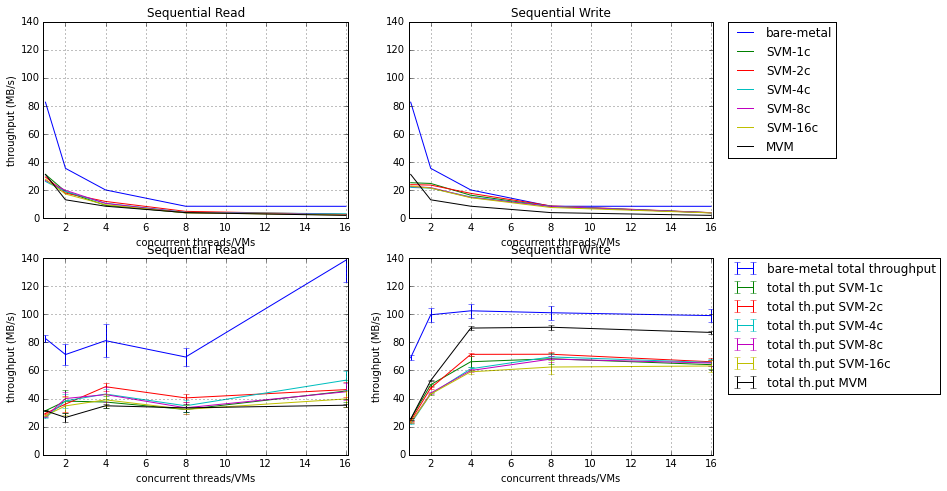

In [25]:
x_axis = [1,2,4,8,16]
pylab.rcParams['figure.figsize'] = 12, 12  # change default size of figures
plt.subplot(321)
plt.plot(x_axis, bwsrbf)
plt.plot(x_axis, bwsrsvm1c) 
plt.plot(x_axis, bwsrsvm2c)
plt.plot(x_axis, bwsrsvm4c)
plt.plot(x_axis, bwsrsvm8c)
plt.plot(x_axis, bwsrsvm16c)
plt.plot(x_axis, bwsrmvm)
plt.axis([0.9, 16.1, 0, 140])
plt.grid(True)
plt.title('Sequential Read')
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('throughput (MB/s)')

plt.subplot(322)
plt.plot(x_axis, bwsrbf, label = 'bare-metal')
plt.plot(x_axis, bwswsvm1c, label = 'SVM-1c') 
plt.plot(x_axis, bwswsvm2c, label = 'SVM-2c')
plt.plot(x_axis, bwswsvm4c, label = 'SVM-4c')
plt.plot(x_axis, bwswsvm8c, label = 'SVM-8c')
plt.plot(x_axis, bwswsvm16c, label = 'SVM-16c')
plt.plot(x_axis, bwsrmvm, label = 'MVM')
plt.axis([0.9, 16.1, 0, 140])
plt.grid(True)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title('Sequential Write')
pylab.xlabel('concurrent threads/VMs')
#pylab.ylabel('throughput (MB/s)')

plt.subplot(323)
plt.errorbar(x_axis, aggbwsrbf, ciaggbwsrbf)
plt.errorbar(x_axis, aggbwsrsvm1c, ciaggbwsrsvm1c)
plt.errorbar(x_axis, aggbwsrsvm2c, ciaggbwsrsvm2c)
plt.errorbar(x_axis, aggbwsrsvm4c, ciaggbwsrsvm4c)
plt.errorbar(x_axis, aggbwsrsvm8c, ciaggbwsrsvm8c)
plt.errorbar(x_axis, aggbwsrsvm16c, ciaggbwsrsvm16c)
plt.errorbar(x_axis, aggbwsrmvm, ciaggbwsrmvm)
plt.axis([0.9, 16.1, 0, 140])
plt.grid(True)
plt.title('Sequential Read')
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('throughput (MB/s)')

plt.subplot(324)
plt.errorbar(x_axis, aggbwswbf, ciaggbwswbf, label = 'bare-metal total throughput')
plt.errorbar(x_axis, aggbwswsvm1c, ciaggbwswsvm1c, label = 'total th.put SVM-1c')
plt.errorbar(x_axis, aggbwswsvm2c, ciaggbwswsvm2c, label = 'total th.put SVM-2c')
plt.errorbar(x_axis, aggbwswsvm4c, ciaggbwswsvm4c, label = 'total th.put SVM-4c')
plt.errorbar(x_axis, aggbwswsvm8c, ciaggbwswsvm8c, label = 'total th.put SVM-8c')
plt.errorbar(x_axis, aggbwswsvm16c, ciaggbwswsvm16c, label = 'total th.put SVM-16c')
plt.errorbar(x_axis, aggbwswmvm, ciaggbwswmvm, label = 'total th.put MVM')
plt.axis([0.9, 16.1, 0, 140])
plt.grid(True)
plt.title('Sequential Write')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('throughput (MB/s)')

#plt.savefig('throughput16procs.pdf')

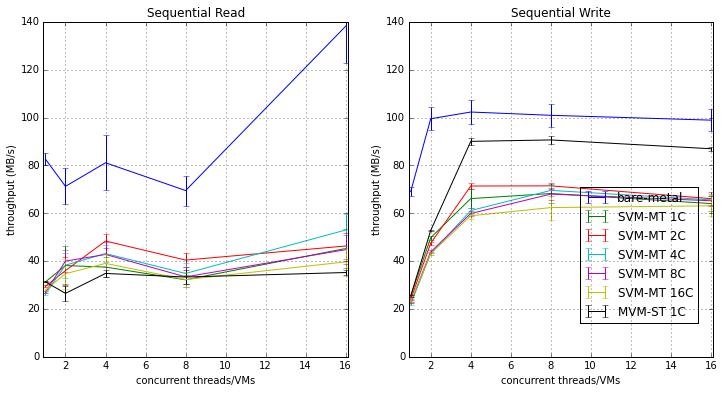

In [26]:
x_axis = [1,2,4,8,16]
pylab.rcParams['figure.figsize'] = 12, 6  # change default size of figures

plt.subplot(121)
plt.errorbar(x_axis, aggbwsrbf, ciaggbwsrbf)
plt.errorbar(x_axis, aggbwsrsvm1c, ciaggbwsrsvm1c)
plt.errorbar(x_axis, aggbwsrsvm2c, ciaggbwsrsvm2c)
plt.errorbar(x_axis, aggbwsrsvm4c, ciaggbwsrsvm4c)
plt.errorbar(x_axis, aggbwsrsvm8c, ciaggbwsrsvm8c)
plt.errorbar(x_axis, aggbwsrsvm16c, ciaggbwsrsvm16c)
plt.errorbar(x_axis, aggbwsrmvm, ciaggbwsrmvm)
plt.axis([0.9, 16.1, 0, 140])
plt.grid(True)
plt.title('Sequential Read')
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('throughput (MB/s)')

plt.subplot(122)
plt.errorbar(x_axis, aggbwswbf, ciaggbwswbf, label = 'bare-metal')
plt.errorbar(x_axis, aggbwswsvm1c, ciaggbwswsvm1c, label = 'SVM-MT 1C')
plt.errorbar(x_axis, aggbwswsvm2c, ciaggbwswsvm2c, label = 'SVM-MT 2C')
plt.errorbar(x_axis, aggbwswsvm4c, ciaggbwswsvm4c, label = 'SVM-MT 4C')
plt.errorbar(x_axis, aggbwswsvm8c, ciaggbwswsvm8c, label = 'SVM-MT 8C')
plt.errorbar(x_axis, aggbwswsvm16c, ciaggbwswsvm16c, label = 'SVM-MT 16C')
plt.errorbar(x_axis, aggbwswmvm, ciaggbwswmvm, label = 'MVM-ST 1C')
plt.axis([0.9, 16.1, 0, 140])
plt.grid(True)
plt.title('Sequential Write')
plt.legend(bbox_to_anchor=(0.95, 0.1), loc=4, borderaxespad=0.)
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('throughput (MB/s)')

#plt.savefig('../figures/throughput_cfq.pdf')

## Throughput normalization

_(throughput of bare-metal is used as baseline)_

In [27]:
from __future__ import division # floating point division in Py2x
# for throughput per thread/VM
nml_bwsrbf = [x/y for x,y in zip(bwsrbf,bwsrbf)]
nml_bwswbf = [x/y for x,y in zip(bwswbf,bwswbf)]

nml_bwsrsvm1c = [x/y for x,y in zip(bwsrsvm1c,bwsrbf)]
nml_bwswsvm1c = [x/y for x,y in zip(bwswsvm1c,bwswbf)]
nml_bwsrsvm2c = [x/y for x,y in zip(bwsrsvm2c,bwsrbf)]
nml_bwswsvm2c = [x/y for x,y in zip(bwswsvm2c,bwswbf)]
nml_bwsrsvm4c = [x/y for x,y in zip(bwsrsvm4c,bwsrbf)]
nml_bwswsvm4c = [x/y for x,y in zip(bwswsvm4c,bwswbf)]
nml_bwsrsvm8c = [x/y for x,y in zip(bwsrsvm8c,bwsrbf)]
nml_bwswsvm8c = [x/y for x,y in zip(bwswsvm8c,bwswbf)]
nml_bwsrsvm16c = [x/y for x,y in zip(bwsrsvm16c,bwsrbf)]
nml_bwswsvm16c = [x/y for x,y in zip(bwswsvm16c,bwswbf)]

nml_bwsrmvm = [x/y for x,y in zip(bwsrmvm,bwsrbf)]
nml_bwswmvm = [x/y for x,y in zip(bwswmvm,bwswbf)]

# for aggregated throughput
nml_aggbwsrbf = [x/y for x,y in zip(aggbwsrbf,aggbwsrbf)]
nml_aggbwswbf = [x/y for x,y in zip(aggbwswbf,aggbwswbf)]

nml_aggbwsrsvm1c = [x/y for x,y in zip(aggbwsrsvm1c,aggbwsrbf)]
nml_aggbwswsvm1c = [x/y for x,y in zip(aggbwswsvm1c,aggbwswbf)]
nml_aggbwsrsvm2c = [x/y for x,y in zip(aggbwsrsvm2c,aggbwsrbf)]
nml_aggbwswsvm2c = [x/y for x,y in zip(aggbwswsvm2c,aggbwswbf)]
nml_aggbwsrsvm4c = [x/y for x,y in zip(aggbwsrsvm4c,aggbwsrbf)]
nml_aggbwswsvm4c = [x/y for x,y in zip(aggbwswsvm4c,aggbwswbf)]
nml_aggbwsrsvm8c = [x/y for x,y in zip(aggbwsrsvm8c,aggbwsrbf)]
nml_aggbwswsvm8c = [x/y for x,y in zip(aggbwswsvm8c,aggbwswbf)]
nml_aggbwsrsvm16c = [x/y for x,y in zip(aggbwsrsvm16c,aggbwsrbf)]
nml_aggbwswsvm16c = [x/y for x,y in zip(aggbwswsvm16c,aggbwswbf)]

nml_aggbwsrmvm = [x/y for x,y in zip(aggbwsrmvm,aggbwsrbf)]
nml_aggbwswmvm = [x/y for x,y in zip(aggbwswmvm,aggbwswbf)]

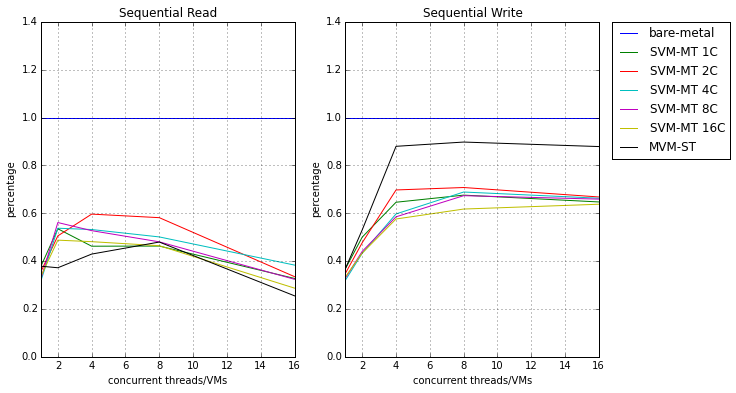

In [28]:
pylab.rcParams['figure.figsize'] = 10, 6  # change default size of figures
x_axis = [1,2,4,8,16]

plt.subplot(121)
plt.plot(x_axis, nml_aggbwsrbf, label = 'bare-metal')
plt.plot(x_axis, nml_aggbwsrsvm1c, label = 'SVM-MT 1C')
plt.plot(x_axis, nml_aggbwsrsvm2c, label = 'SVM-MT 2C')
plt.plot(x_axis, nml_aggbwsrsvm4c, label = 'SVM-MT 4C')
plt.plot(x_axis, nml_aggbwsrsvm8c, label = 'SVM-MT 8C')
plt.plot(x_axis, nml_aggbwsrsvm16c, label = 'SVM-MT 16C')
plt.plot(x_axis, nml_aggbwsrmvm, label = 'MVM-ST')
plt.axis([1, 16, 0, 1.4])
plt.grid(True)
plt.title('Sequential Read')
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('percentage')

plt.subplot(122)
plt.plot(x_axis, nml_aggbwswbf, label = 'bare-metal')
plt.plot(x_axis, nml_aggbwswsvm1c, label = 'SVM-MT 1C')
plt.plot(x_axis, nml_aggbwswsvm2c, label = 'SVM-MT 2C')
plt.plot(x_axis, nml_aggbwswsvm4c, label = 'SVM-MT 4C')
plt.plot(x_axis, nml_aggbwswsvm8c, label = 'SVM-MT 8C')
plt.plot(x_axis, nml_aggbwswsvm16c, label = 'SVM-MT 16C')
plt.plot(x_axis, nml_aggbwswmvm, label = 'MVM-ST')
plt.axis([1, 16, 0, 1.4])
plt.grid(True)
plt.title('Sequential Write')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('percentage')

#plt.savefig('nml_throughput16procs.pdf')

In order to see the overhead in compare to the baremetal, we will look at the normalization of the aggregated throughput of the three platforms: bare-metal, single VM with multiple threads, and multiple VMs with single thread. We set the throughput of baremetal as the base and compare with the VM ones.

To answer these questions, we will look into other metrics of the experiments: Jain Fairness Index, CPU utilisation, Disk Utilization, Context Switching.

## Jain Fairness Index

In [29]:
jfi = dtdata.T.sum()**2/dtdata.T.count()/(dtdata**2).T.sum() #Calculate Jair Fairness Index for each test
jfigrouped = jfi.groupby(level=0)
jfiavg = jfigrouped.mean() # Calculate JFI average from 5 tests

# for plotting confident interval
# jfistd = jfigrouped.std() # Standard Deviation
cijfi = jfigrouped.aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # Confident interval of 95%

# prepare for plotting
jfisrbf = jfiavg.filter(regex="^SRBF32CTH").tolist()
jfiswbf = jfiavg.filter(regex="^SWBF32CTH").tolist()

jfisrsvm1c = jfiavg.filter(regex="^SR01VM01CTH").tolist()
jfiswsvm1c = jfiavg.filter(regex="^SW01VM01CTH").tolist()
jfisrsvm2c = jfiavg.filter(regex="^SR01VM02CTH").tolist()
jfiswsvm2c = jfiavg.filter(regex="^SW01VM02CTH").tolist()
jfisrsvm4c = jfiavg.filter(regex="^SR01VM04CTH").tolist()
jfiswsvm4c = jfiavg.filter(regex="^SW01VM04CTH").tolist()
jfisrsvm8c = jfiavg.filter(regex="^SR01VM08CTH").tolist()
jfiswsvm8c = jfiavg.filter(regex="^SW01VM08CTH").tolist()
jfisrsvm16c = jfiavg.filter(regex="^SR01VM16CTH").tolist()
jfiswsvm16c = jfiavg.filter(regex="^SW01VM16CTH").tolist()

jfisrmvm = jfiavg.filter(regex="^SR[0-9]+VM01CTH01").tolist()
jfiswmvm = jfiavg.filter(regex="^SW[0-9]+VM01CTH01").tolist()


cijfisrbf = cijfi.filter(regex="^SRBF32CTH").tolist()
cijfiswbf = cijfi.filter(regex="^SWBF32CTH").tolist()

cijfisrsvm1c = cijfi.filter(regex="^SR01VM01CTH").tolist()
cijfiswsvm1c = cijfi.filter(regex="^SW01VM01CTH").tolist()
cijfisrsvm2c = cijfi.filter(regex="^SR01VM02CTH").tolist()
cijfiswsvm2c = cijfi.filter(regex="^SW01VM02CTH").tolist()
cijfisrsvm4c = cijfi.filter(regex="^SR01VM04CTH").tolist()
cijfiswsvm4c = cijfi.filter(regex="^SW01VM04CTH").tolist()
cijfisrsvm8c = cijfi.filter(regex="^SR01VM08CTH").tolist()
cijfiswsvm8c = cijfi.filter(regex="^SW01VM08CTH").tolist()
cijfisrsvm16c = cijfi.filter(regex="^SR01VM16CTH").tolist()
cijfiswsvm16c = cijfi.filter(regex="^SW01VM16CTH").tolist()

cijfisrmvm = cijfi.filter(regex="^SR[0-9]+VM01CTH01").tolist()
cijfiswmvm = cijfi.filter(regex="^SW[0-9]+VM01CTH01").tolist()

([<matplotlib.axis.XTick at 0x7fb65b6c6250>,
 <a list of 5 Text xticklabel objects>)

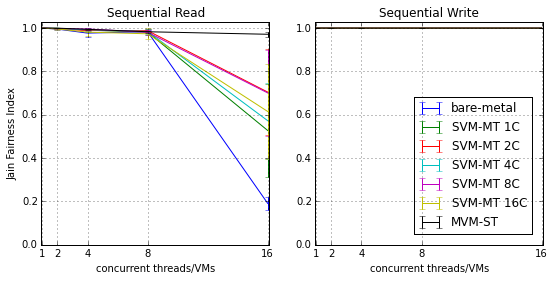

In [30]:
pylab.rcParams['figure.figsize'] = 9, 4  # change default size of figures
x_axis = [1,2,4,8,16]

plt.subplot(121)
plt.errorbar(x_axis, jfisrbf, cijfisrbf, label = 'bare-metal')
plt.errorbar(x_axis, jfisrsvm1c, cijfisrsvm1c, label = 'SVM-MT 1C')
plt.errorbar(x_axis, jfisrsvm2c, cijfisrsvm2c, label = 'SVM-MT 2C')
plt.errorbar(x_axis, jfisrsvm4c, cijfisrsvm4c, label = 'SVM-MT 4C')
plt.errorbar(x_axis, jfisrsvm8c, cijfisrsvm8c, label = 'SVM-MT 8C')
plt.errorbar(x_axis, jfisrsvm16c, cijfisrsvm16c, label = 'SVM-MT 16C')
plt.errorbar(x_axis, jfisrmvm, cijfisrmvm, label = 'MVM-ST')
plt.axis([0.9, 16.1, 0, 1.03])
plt.grid(True)
plt.title('Sequential Read')
plt.xlabel('concurrent threads/VMs')
plt.ylabel('Jain Fairness Index')
plt.xticks(x_axis)

plt.subplot(122)
plt.errorbar(x_axis, jfiswbf, cijfiswbf, label = 'bare-metal')
plt.errorbar(x_axis, jfiswsvm1c, cijfiswsvm1c, label = 'SVM-MT 1C')
plt.errorbar(x_axis, jfiswsvm2c, cijfiswsvm2c, label = 'SVM-MT 2C')
plt.errorbar(x_axis, jfiswsvm4c, cijfiswsvm4c, label = 'SVM-MT 4C')
plt.errorbar(x_axis, jfiswsvm8c, cijfiswsvm8c, label = 'SVM-MT 8C')
plt.errorbar(x_axis, jfiswsvm16c, cijfiswsvm16c, label = 'SVM-MT 16C')
plt.errorbar(x_axis, jfiswmvm, cijfiswmvm, label = 'MVM-ST')
plt.axis([0.9, 16.1, 0, 1.03])
plt.grid(True)
plt.title('Sequential Write')
plt.xlabel('concurrent threads/VMs')
plt.legend(bbox_to_anchor=(0.95, 0.05), loc=4, borderaxespad=0.)
#plt.ylabel('JFI index')
plt.xticks(x_axis)

#plt.savefig('jfi16procs.pdf')

Jain Fairness Index (JFI) has a range from 0 to 1 which indicates the level of fairness between concurrent threads. If the threads receive equal partition of bandwidth, we would achieve index of 1. If only k of n flows receive equal bandwidth (and others get none), index is k/n. In the worst case, JFI has the index of 0. We plot some figures of JFI for the three platforms with confident interval of 95%. The figures show that JFI is always over 0.9 which means that threads have very equal throughput or fair to each others. We also notice the reader that the figures show value of JFI from 0.85 to 1.05 for a clear view on the JFI of the system.

## CPU Utilization

For CPU utilization, FIO relies on _getrusage()_. _Getrusage()_ returns resource usage statistics for the calling thread.
The resource usages are returned in the structure pointed by the usage caller, which has the following form:
~~~
struct rusage {
    struct timeval ru_utime; /* user CPU time used */
    struct timeval ru_stime; /* system CPU time used */
    ...
    long   ru_minflt;        /* page reclaims (soft page faults) */
    long   ru_majflt;        /* page faults (hard page faults) */
    long   ru_nswap;         /* swaps */
    ...
    long   ru_nvcsw;         /* voluntary context switches */
    long   ru_nivcsw;        /* involuntary context switches */
};
~~~
and contains inside the _struct_:
* _ru_utime_: This is the total amount of time spent executing in user mode, expressed in a _timeval_ structure (seconds plus microseconds).
* _ru_stime_: This is the total amount of time spent executing in kernel mode, expressed in a _timeval_ structure (seconds plus microseconds).
* _ru_nvcsw_: The number of times a context switch resulted due to a process voluntarily giving up the processor before its time slice was completed (usually to await availability of a resource).
* _ru_nivcsw_: The number of times a context switch resulted due to a higher priority process becoming runnable or because the current process exceeded its time slice.

FIO reports the CPU utilization for each thread by (_user_time/total_run_time_) and (_system_time/total_run_time_), where:
* _user_time_ is the duration that the thread spending in user space
* _system_time_ is the duration the that the thread spending in kernel space
* _total_run_time_ is the duration from the time that thread starts until the time that thread finishs or the wall lock time.

~~~
	runtime = ts->total_run_time;
	if (runtime) {
		double runt = (double) runtime;

		usr_cpu = (double) ts->usr_time * 100 / runt;
		sys_cpu = (double) ts->sys_time * 100 / runt;
	} else {
		usr_cpu = 0;
		sys_cpu = 0;
	}
~~~
In this report, we especially focus on the the serving time (the time that thread actually uses the CPU) and the waiting time (the time that thread has to wait for the others until its slice is up). Serving time and Waiting time were calculated by this formular:
~~~
    serving_time = user_time + kernel_time
    waiting_time = total_thread_runtime - serving_time
~~~

In [31]:
# Remove percentage symbol in csv file first
!sed -i 's/%//g' data/cpuus16p4gbf12cache_deadline_sync.csv
!sed -i 's/%//g' data/cpuks16p4gbf12cache_deadline_sync.csv
# Load time spending in user space
cpuusresult = pd.read_csv('data/cpuus16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
cpuusdata = cpuusresult[range(1,17)]
cpuusindex = cpuusresult[0]
cpuusdata.index = cpuusindex.str.replace('T[0-2][0-9]', '',case=False)
# Load time spending in kernel space
cpuksresult = pd.read_csv('data/cpuks16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
cpuksdata = cpuksresult[range(1,17)]
cpuksindex = cpuksresult[0]
cpuksdata.index = cpuksindex.str.replace('T[0-2][0-9]', '',case=False)
# Load total runtime of thread
threadruntimeresult = pd.read_csv('data/rt16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
threadruntimedata = threadruntimeresult[range(1,17)]
threadruntimeindex = threadruntimeresult[0]
threadruntimedata.index = threadruntimeindex.str.replace('T[0-2][0-9]', '',case=False)
# Calculate duration that thread utilise the CPU
# Real CPU utilisation duration (ms) = (user time (%) + system time (%)) * runtime (ms)
totalcpupercentage = cpuusdata + cpuksdata
totalcputime = totalcpupercentage.mul(threadruntimedata,1) / 100
totalcputimehostin1test = totalcputime.T.sum() # Sum of CPU serving time in one test
totalcputime5testsgrouped = totalcputimehostin1test.groupby(level=0) 
totalcputimehostavgin5tests = totalcputime5testsgrouped.mean() # Mean of each thread/VM on 5 tests
citct = totalcputime5testsgrouped.aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # Confident interval of 95%
threadruntimehostin1test = threadruntimedata.T.sum() # Sum of thread running time in one test
threadruntime5testsgrouped = threadruntimehostin1test.groupby(level=0) 
threadruntimehostavgin5tests = threadruntime5testsgrouped.mean() # Mean of each thread/VM on 5 tests
citrt = threadruntime5testsgrouped.aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # Confident interval of 95%
# CPU serving time
tctsrbf = totalcputimehostavgin5tests.filter(regex="^SRBF32CTH").tolist()
tctswbf = totalcputimehostavgin5tests.filter(regex="^SWBF32CTH").tolist()

tctsrsvm1c = totalcputimehostavgin5tests.filter(regex="^SR01VM01CTH").tolist()
tctswsvm1c = totalcputimehostavgin5tests.filter(regex="^SW01VM01CTH").tolist()
tctsrsvm2c = totalcputimehostavgin5tests.filter(regex="^SR01VM02CTH").tolist()
tctswsvm2c = totalcputimehostavgin5tests.filter(regex="^SW01VM02CTH").tolist()
tctsrsvm4c = totalcputimehostavgin5tests.filter(regex="^SR01VM04CTH").tolist()
tctswsvm4c = totalcputimehostavgin5tests.filter(regex="^SW01VM04CTH").tolist()
tctsrsvm8c = totalcputimehostavgin5tests.filter(regex="^SR01VM08CTH").tolist()
tctswsvm8c = totalcputimehostavgin5tests.filter(regex="^SW01VM08CTH").tolist()
tctsrsvm16c = totalcputimehostavgin5tests.filter(regex="^SR01VM16CTH").tolist()
tctswsvm16c = totalcputimehostavgin5tests.filter(regex="^SW01VM16CTH").tolist()

tctsrmvm = totalcputimehostavgin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
tctswmvm = totalcputimehostavgin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()


# Confident interval
citctsrbf = citct.filter(regex="^SRBF32CTH").tolist()
citctswbf = citct.filter(regex="^SWBF32CTH").tolist()

citctsrsvm1c = citct.filter(regex="^SR01VM01CTH").tolist()
citctswsvm1c = citct.filter(regex="^SW01VM01CTH").tolist()
citctsrsvm2c = citct.filter(regex="^SR01VM02CTH").tolist()
citctswsvm2c = citct.filter(regex="^SW01VM02CTH").tolist()
citctsrsvm4c = citct.filter(regex="^SR01VM04CTH").tolist()
citctswsvm4c = citct.filter(regex="^SW01VM04CTH").tolist()
citctsrsvm8c = citct.filter(regex="^SR01VM08CTH").tolist()
citctswsvm8c = citct.filter(regex="^SW01VM08CTH").tolist()
citctsrsvm16c = citct.filter(regex="^SR01VM16CTH").tolist()
citctswsvm16c = citct.filter(regex="^SW01VM16CTH").tolist()

citctsrmvm = citct.filter(regex="^SR[0-9]+VM01CTH01").tolist()
citctswmvm = citct.filter(regex="^SW[0-9]+VM01CTH01").tolist()


# Thread running time
trtsrbf = threadruntimehostavgin5tests.filter(regex="^SRBF32CTH").tolist()
trtswbf = threadruntimehostavgin5tests.filter(regex="^SWBF32CTH").tolist()

trtsrsvm1c = threadruntimehostavgin5tests.filter(regex="^SR01VM01CTH").tolist()
trtswsvm1c = threadruntimehostavgin5tests.filter(regex="^SW01VM01CTH").tolist()
trtsrsvm2c = threadruntimehostavgin5tests.filter(regex="^SR01VM02CTH").tolist()
trtswsvm2c = threadruntimehostavgin5tests.filter(regex="^SW01VM02CTH").tolist()
trtsrsvm4c = threadruntimehostavgin5tests.filter(regex="^SR01VM04CTH").tolist()
trtswsvm4c = threadruntimehostavgin5tests.filter(regex="^SW01VM04CTH").tolist()
trtsrsvm8c = threadruntimehostavgin5tests.filter(regex="^SR01VM08CTH").tolist()
trtswsvm8c = threadruntimehostavgin5tests.filter(regex="^SW01VM08CTH").tolist()
trtsrsvm16c = threadruntimehostavgin5tests.filter(regex="^SR01VM16CTH").tolist()
trtswsvm16c = threadruntimehostavgin5tests.filter(regex="^SW01VM16CTH").tolist()

trtsrmvm = threadruntimehostavgin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
trtswmvm = threadruntimehostavgin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()


# Confident interval
citrtsrbf = citrt.filter(regex="^SRBF32CTH").tolist()
citrtswbf = citrt.filter(regex="^SWBF32CTH").tolist()
 
citrtsrsvm1c = citrt.filter(regex="^SR01VM01CTH").tolist()
citrtswsvm1c = citct.filter(regex="^SW01VM01CTH").tolist()
citrtsrsvm2c = citrt.filter(regex="^SR01VM02CTH").tolist()
citrtswsvm2c = citct.filter(regex="^SW01VM02CTH").tolist()
citrtsrsvm4c = citrt.filter(regex="^SR01VM04CTH").tolist()
citrtswsvm4c = citct.filter(regex="^SW01VM04CTH").tolist()
citrtsrsvm8c = citrt.filter(regex="^SR01VM08CTH").tolist()
citrtswsvm8c = citct.filter(regex="^SW01VM08CTH").tolist()
citrtsrsvm16c = citrt.filter(regex="^SR01VM16CTH").tolist()
citrtswsvm16c = citct.filter(regex="^SW01VM16CTH").tolist()

citrtsrmvm = citrt.filter(regex="^SR[0-9]+VM01CTH01").tolist()
citrtswmvm = citrt.filter(regex="^SW[0-9]+VM01CTH01").tolist()


([<matplotlib.axis.XTick at 0x7fb65ae73d10>,
 <a list of 5 Text xticklabel objects>)

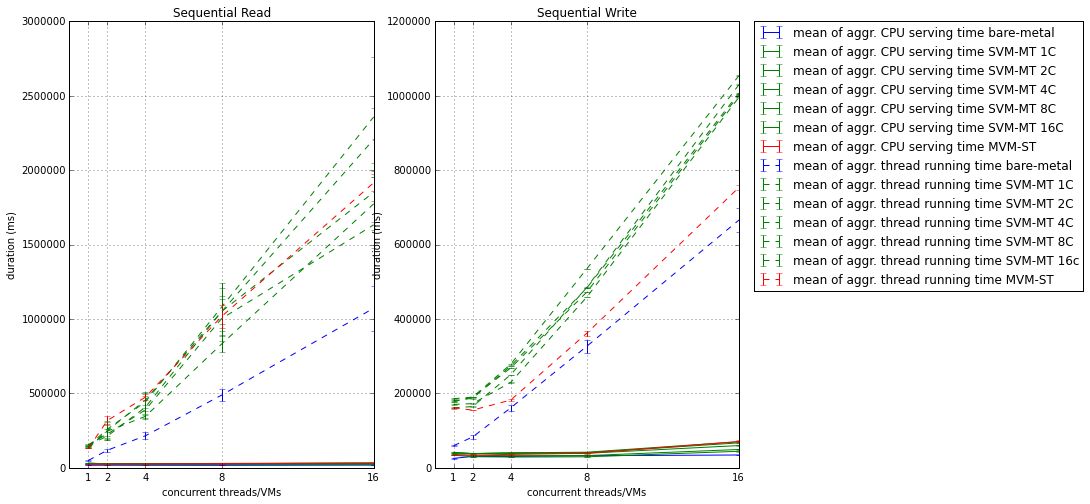

In [32]:
x_axis = [1,2,4,8,16]
pylab.rcParams['figure.figsize'] = 12, 8  # change default size of figures

plt.subplot(121)
plt.errorbar(x_axis, tctsrbf, citctsrbf, color="blue")
plt.errorbar(x_axis, tctsrsvm1c, citctsrsvm1c, color="green")
plt.errorbar(x_axis, tctsrsvm2c, citctsrsvm2c, color="green")
plt.errorbar(x_axis, tctsrsvm4c, citctsrsvm4c, color="green")
plt.errorbar(x_axis, tctsrsvm8c, citctsrsvm8c, color="green")
plt.errorbar(x_axis, tctsrsvm16c, citctsrsvm16c, color="green")
plt.errorbar(x_axis, tctsrmvm, citctsrmvm, color="red")
plt.errorbar(x_axis, trtsrbf, citrtsrbf, ls="dashed", color="blue")
plt.errorbar(x_axis, trtsrsvm1c, citrtsrsvm1c, ls="dashed", color="green")
plt.errorbar(x_axis, trtsrsvm2c, citrtsrsvm2c, ls="dashed", color="green")
plt.errorbar(x_axis, trtsrsvm4c, citrtsrsvm4c, ls="dashed", color="green")
plt.errorbar(x_axis, trtsrsvm8c, citrtsrsvm8c, ls="dashed", color="green")
plt.errorbar(x_axis, trtsrsvm16c, citrtsrsvm16c, ls="dashed", color="green")
plt.errorbar(x_axis, trtsrmvm, citrtsrmvm, ls="dashed", color="red")
#plt.axis([0.9, 16.1, 0, 110000])
plt.grid(True)
plt.title('Sequential Read')
plt.xlabel('concurrent threads/VMs')
plt.ylabel('duration (ms)')
plt.xticks(x_axis)

plt.subplot(122)
plt.errorbar(x_axis, tctswbf, citctswbf, color="blue", label = 'mean of aggr. CPU serving time bare-metal')
plt.errorbar(x_axis, tctswsvm1c, citctswsvm1c, color="green", label = 'mean of aggr. CPU serving time SVM-MT 1C')
plt.errorbar(x_axis, tctswsvm2c, citctswsvm2c, color="green", label = 'mean of aggr. CPU serving time SVM-MT 2C')
plt.errorbar(x_axis, tctswsvm4c, citctswsvm4c, color="green", label = 'mean of aggr. CPU serving time SVM-MT 4C')
plt.errorbar(x_axis, tctswsvm8c, citctswsvm8c, color="green", label = 'mean of aggr. CPU serving time SVM-MT 8C')
plt.errorbar(x_axis, tctswsvm16c, citctswsvm16c, color="green", label = 'mean of aggr. CPU serving time SVM-MT 16C')
plt.errorbar(x_axis, tctswmvm, citctswmvm, color="red", label = 'mean of aggr. CPU serving time MVM-ST')
plt.errorbar(x_axis, trtswbf, citrtswbf, ls="dashed", color="blue", label = 'mean of aggr. thread running time bare-metal')
plt.errorbar(x_axis, trtswsvm1c, citrtswsvm1c, ls="dashed", color="green", label = 'mean of aggr. thread running time SVM-MT 1C')
plt.errorbar(x_axis, trtswsvm2c, citrtswsvm2c, ls="dashed", color="green", label = 'mean of aggr. thread running time SVM-MT 2C')
plt.errorbar(x_axis, trtswsvm4c, citrtswsvm4c, ls="dashed", color="green", label = 'mean of aggr. thread running time SVM-MT 4C')
plt.errorbar(x_axis, trtswsvm8c, citrtswsvm8c, ls="dashed", color="green", label = 'mean of aggr. thread running time SVM-MT 8C')
plt.errorbar(x_axis, trtswsvm16c, citrtswsvm16c, ls="dashed", color="green", label = 'mean of aggr. thread running time SVM-MT 16c')
plt.errorbar(x_axis, trtswmvm, citrtswmvm, ls="dashed", color="red", label = 'mean of aggr. thread running time MVM-ST')
#plt.axis([0.9, 16.1, 0, 110000])
plt.grid(True)
plt.title('Sequential Write')
plt.legend(bbox_to_anchor=(1.05, 1), loc=0, borderaxespad=0.)
plt.xlabel('concurrent threads/VMs')
plt.ylabel('duration (ms)')
plt.xticks(x_axis)
#plt.savefig('CPUutilisation16procs.pdf')

We notice the waiting time for for bare-metal is greater than the virtualized one while the serving time is slower. This explain part of the reason why the throughput of baremetal is not as good as the virtualised one. But why it spends a lot of time for waiting is till a big question.

In [33]:
# for throughput per thread/VM
nml_tctsrbf = [x/y for x,y in zip(tctsrbf,tctsrbf)]
nml_tctswbf = [x/y for x,y in zip(tctswbf,tctswbf)]

nml_tctsrsvm1c = [x/y for x,y in zip(tctsrsvm1c,tctsrbf)]
nml_tctswsvm1c = [x/y for x,y in zip(tctswsvm1c,tctswbf)]
nml_tctsrsvm2c = [x/y for x,y in zip(tctsrsvm2c,tctsrbf)]
nml_tctswsvm2c = [x/y for x,y in zip(tctswsvm2c,tctswbf)]
nml_tctsrsvm4c = [x/y for x,y in zip(tctsrsvm4c,tctsrbf)]
nml_tctswsvm4c = [x/y for x,y in zip(tctswsvm4c,tctswbf)]
nml_tctsrsvm8c = [x/y for x,y in zip(tctsrsvm8c,tctsrbf)]
nml_tctswsvm8c = [x/y for x,y in zip(tctswsvm8c,tctswbf)]
nml_tctsrsvm16c = [x/y for x,y in zip(tctsrsvm16c,tctsrbf)]
nml_tctswsvm16c = [x/y for x,y in zip(tctswsvm16c,tctswbf)]

nml_tctsrmvm = [x/y for x,y in zip(tctsrmvm,tctsrbf)]
nml_tctswmvm = [x/y for x,y in zip(tctswmvm,tctswbf)]


# for throughput per thread/VM
nml_trtsrbf = [x/y for x,y in zip(trtsrbf,trtsrbf)]
nml_trtswbf = [x/y for x,y in zip(trtswbf,trtswbf)]

nml_trtsrsvm1c = [x/y for x,y in zip(trtsrsvm1c,trtsrbf)]
nml_trtswsvm1c = [x/y for x,y in zip(trtswsvm1c,trtswbf)]
nml_trtsrsvm2c = [x/y for x,y in zip(trtsrsvm2c,trtsrbf)]
nml_trtswsvm2c = [x/y for x,y in zip(trtswsvm2c,trtswbf)]
nml_trtsrsvm4c = [x/y for x,y in zip(trtsrsvm4c,trtsrbf)]
nml_trtswsvm4c = [x/y for x,y in zip(trtswsvm4c,trtswbf)]
nml_trtsrsvm8c = [x/y for x,y in zip(trtsrsvm8c,trtsrbf)]
nml_trtswsvm8c = [x/y for x,y in zip(trtswsvm8c,trtswbf)]
nml_trtsrsvm16c = [x/y for x,y in zip(trtsrsvm16c,trtsrbf)]
nml_trtswsvm16c = [x/y for x,y in zip(trtswsvm16c,trtswbf)]

nml_trtsrmvm = [x/y for x,y in zip(trtsrmvm,trtsrbf)]
nml_trtswmvm = [x/y for x,y in zip(trtswmvm,trtswbf)]


([<matplotlib.axis.XTick at 0x7fb65a9b6590>,
 <a list of 5 Text xticklabel objects>)

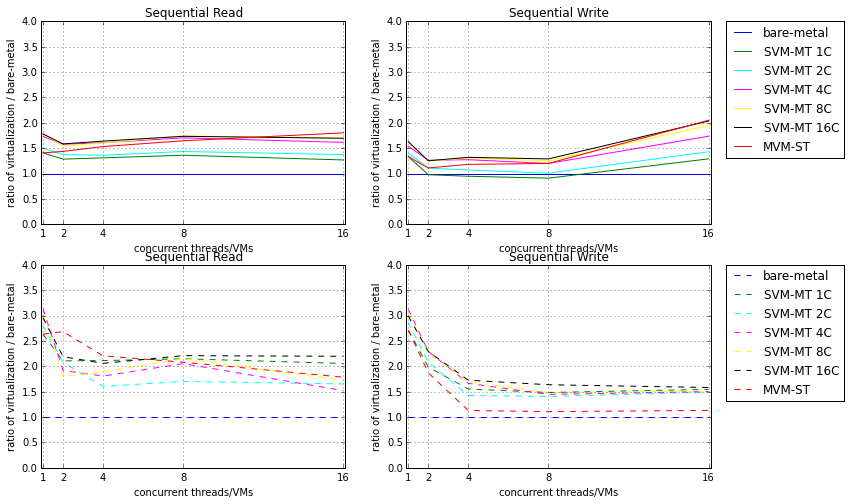

In [34]:
pylab.rcParams['figure.figsize'] = 12, 8  # change default size of figures

plt.subplot(221)
plt.plot(x_axis, nml_tctsrbf, color="blue")
plt.plot(x_axis, nml_tctsrsvm1c, color="green")
plt.plot(x_axis, nml_tctsrsvm2c, color="cyan")
plt.plot(x_axis, nml_tctsrsvm4c, color="magenta")
plt.plot(x_axis, nml_tctsrsvm8c, color="yellow")
plt.plot(x_axis, nml_tctsrsvm16c, color="black")
plt.plot(x_axis, nml_tctsrmvm, color="red")
plt.axis([0.9, 16.1, 0, 4])
plt.grid(True)
plt.title('Sequential Read')
plt.xlabel('concurrent threads/VMs')
plt.ylabel('ratio of virtualization / bare-metal')
plt.xticks(x_axis)

plt.subplot(222)
plt.plot(x_axis, nml_tctswbf, color="blue", label = 'bare-metal')
plt.plot(x_axis, nml_tctswsvm1c, color="green", label = 'SVM-MT 1C')
plt.plot(x_axis, nml_tctswsvm2c, color="cyan", label = 'SVM-MT 2C')
plt.plot(x_axis, nml_tctswsvm4c, color="magenta", label = 'SVM-MT 4C')
plt.plot(x_axis, nml_tctswsvm8c, color="yellow", label = 'SVM-MT 8C')
plt.plot(x_axis, nml_tctswsvm16c, color="black", label = 'SVM-MT 16C')
plt.plot(x_axis, nml_tctswmvm, color="red", label = 'MVM-ST')
plt.axis([0.9, 16.1, 0, 4])
plt.grid(True)
plt.title('Sequential Write')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('concurrent threads/VMs')
plt.ylabel('ratio of virtualization / bare-metal')
plt.xticks(x_axis)

plt.subplot(223)
plt.plot(x_axis, nml_trtsrbf, ls="dashed", color="blue")
plt.plot(x_axis, nml_trtsrsvm1c, ls="dashed", color="green")
plt.plot(x_axis, nml_trtsrsvm2c, ls="dashed", color="cyan")
plt.plot(x_axis, nml_trtsrsvm4c, ls="dashed", color="magenta")
plt.plot(x_axis, nml_trtsrsvm8c, ls="dashed", color="yellow")
plt.plot(x_axis, nml_trtsrsvm16c, ls="dashed", color="black")
plt.plot(x_axis, nml_trtsrmvm, ls="dashed", color="red")
plt.axis([0.9, 16.1, 0, 4])
plt.grid(True)
plt.title('Sequential Read')
plt.xlabel('concurrent threads/VMs')
plt.ylabel('ratio of virtualization / bare-metal')
plt.xticks(x_axis)

plt.subplot(224)
plt.plot(x_axis, nml_trtswbf, ls="dashed", color="blue", label = 'bare-metal')
plt.plot(x_axis, nml_trtswsvm1c, ls="dashed", color="green", label = 'SVM-MT 1C')
plt.plot(x_axis, nml_trtswsvm2c, ls="dashed", color="cyan", label = 'SVM-MT 2C')
plt.plot(x_axis, nml_trtswsvm4c, ls="dashed", color="magenta", label = 'SVM-MT 4C')
plt.plot(x_axis, nml_trtswsvm8c, ls="dashed", color="yellow", label = 'SVM-MT 8C')
plt.plot(x_axis, nml_trtswsvm16c, ls="dashed", color="black", label = 'SVM-MT 16C')
plt.plot(x_axis, nml_trtswmvm, ls="dashed", color="red", label = 'MVM-ST')
plt.axis([0.9, 16.1, 0, 4])
plt.grid(True)
plt.title('Sequential Write')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.xlabel('concurrent threads/VMs')
plt.ylabel('ratio of virtualization / bare-metal')
plt.xticks(x_axis)

#plt.savefig('nml_CPUutilisation16procs.pdf')

## Context Switching

In [35]:
dtresult = pd.read_csv('data/cpucs16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
dtdata = dtresult[range(1,17)]
dtindex = dtresult[0]
dtdata.index = dtindex.str.replace('T[0-2][0-9]', '',case=False)

# Calculate aggregated context switching on each host of each test, then taking the average
aggcsin1test = dtdata.T.sum() # Aggregate throughput on each host in one test
avgaggcsintestgrouped = aggcsin1test.groupby(level=0)
avgaggcsin5tests = avgaggcsintestgrouped.mean() # Then calculate the average of the total CS through 5 tests
ciaggcsin5tests = avgaggcsintestgrouped.aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # Confident interval of 95%

# Putting average aggregate throughput to vector before plotting
aggcssrbf = avgaggcsin5tests.filter(regex="^SRBF32CTH").tolist()
aggcsswbf = avgaggcsin5tests.filter(regex="^SWBF32CTH").tolist()
aggcssrsvm1c = avgaggcsin5tests.filter(regex="^SR01VM01CTH").tolist()
aggcsswsvm1c = avgaggcsin5tests.filter(regex="^SW01VM01CTH").tolist()
aggcssrsvm2c = avgaggcsin5tests.filter(regex="^SR01VM02CTH").tolist()
aggcsswsvm2c = avgaggcsin5tests.filter(regex="^SW01VM02CTH").tolist()
aggcssrsvm4c = avgaggcsin5tests.filter(regex="^SR01VM04CTH").tolist()
aggcsswsvm4c = avgaggcsin5tests.filter(regex="^SW01VM04CTH").tolist()
aggcssrsvm8c = avgaggcsin5tests.filter(regex="^SR01VM08CTH").tolist()
aggcsswsvm8c = avgaggcsin5tests.filter(regex="^SW01VM08CTH").tolist()
aggcssrsvm16c = avgaggcsin5tests.filter(regex="^SR01VM16CTH").tolist()
aggcsswsvm16c = avgaggcsin5tests.filter(regex="^SW01VM16CTH").tolist()
aggcssrmvm = avgaggcsin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
aggcsswmvm = avgaggcsin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()

# Confidence Interval
ciaggcssrbf = ciaggcsin5tests.filter(regex="^SRBF32CTH").tolist()
ciaggcsswbf = ciaggcsin5tests.filter(regex="^SWBF32CTH").tolist()
ciaggcssrsvm1c = ciaggcsin5tests.filter(regex="^SR01VM01CTH").tolist()
ciaggcsswsvm1c = ciaggcsin5tests.filter(regex="^SW01VM01CTH").tolist()
ciaggcssrsvm2c = ciaggcsin5tests.filter(regex="^SR01VM02CTH").tolist()
ciaggcsswsvm2c = ciaggcsin5tests.filter(regex="^SW01VM02CTH").tolist()
ciaggcssrsvm4c = ciaggcsin5tests.filter(regex="^SR01VM04CTH").tolist()
ciaggcsswsvm4c = ciaggcsin5tests.filter(regex="^SW01VM04CTH").tolist()
ciaggcssrsvm8c = ciaggcsin5tests.filter(regex="^SR01VM08CTH").tolist()
ciaggcsswsvm8c = ciaggcsin5tests.filter(regex="^SW01VM08CTH").tolist()
ciaggcssrsvm16c = ciaggcsin5tests.filter(regex="^SR01VM16CTH").tolist()
ciaggcsswsvm16c = ciaggcsin5tests.filter(regex="^SW01VM16CTH").tolist()
ciaggcssrmvm = ciaggcsin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
ciaggcsswmvm = ciaggcsin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()

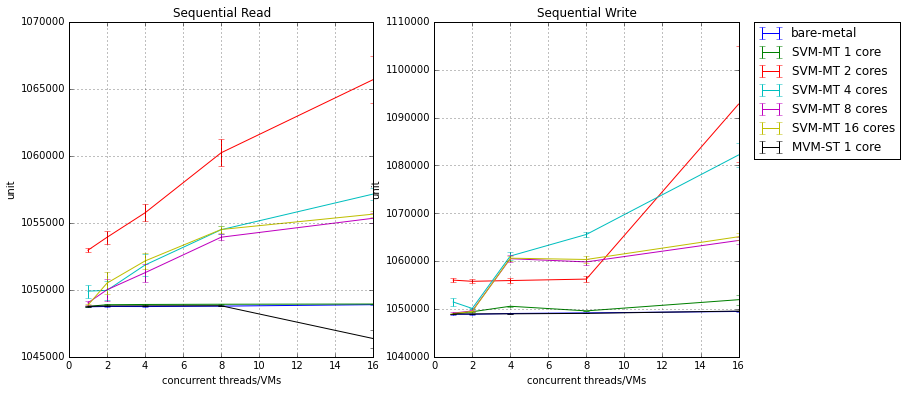

In [36]:
x_axis = [1,2,4,8,16]
pylab.rcParams['figure.figsize'] = 12, 6  # change default size of figures

plt.subplot(121)
plt.errorbar(x_axis, aggcssrbf, ciaggcssrbf)
plt.errorbar(x_axis, aggcssrsvm1c, ciaggcssrsvm1c)
plt.errorbar(x_axis, aggcssrsvm2c, ciaggcssrsvm2c)
plt.errorbar(x_axis, aggcssrsvm4c, ciaggcssrsvm4c)
plt.errorbar(x_axis, aggcssrsvm8c, ciaggcssrsvm8c)
plt.errorbar(x_axis, aggcssrsvm16c, ciaggcssrsvm16c)
plt.errorbar(x_axis, aggcssrmvm, ciaggcssrmvm)
#plt.axis([0.9, 16.1, 0, 110])
plt.grid(True)
plt.title('Sequential Read')
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('unit')

plt.subplot(122)
plt.errorbar(x_axis, aggcsswbf, ciaggcsswbf, label = 'bare-metal')
plt.errorbar(x_axis, aggcsswsvm1c, ciaggcsswsvm1c, label = 'SVM-MT 1 core')
plt.errorbar(x_axis, aggcsswsvm2c, ciaggcsswsvm2c, label = 'SVM-MT 2 cores')
plt.errorbar(x_axis, aggcsswsvm4c, ciaggcsswsvm4c, label = 'SVM-MT 4 cores')
plt.errorbar(x_axis, aggcsswsvm8c, ciaggcsswsvm8c, label = 'SVM-MT 8 cores')
plt.errorbar(x_axis, aggcsswsvm16c, ciaggcsswsvm16c, label = 'SVM-MT 16 cores')
plt.errorbar(x_axis, aggcsswmvm, ciaggcsswmvm, label = 'MVM-ST 1 core')
#plt.axis([0.9, 16.1, 0, 110])
plt.grid(True)
plt.title('Sequential Write')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('unit')

#plt.savefig('throughput16procs.pdf')

## IOPS

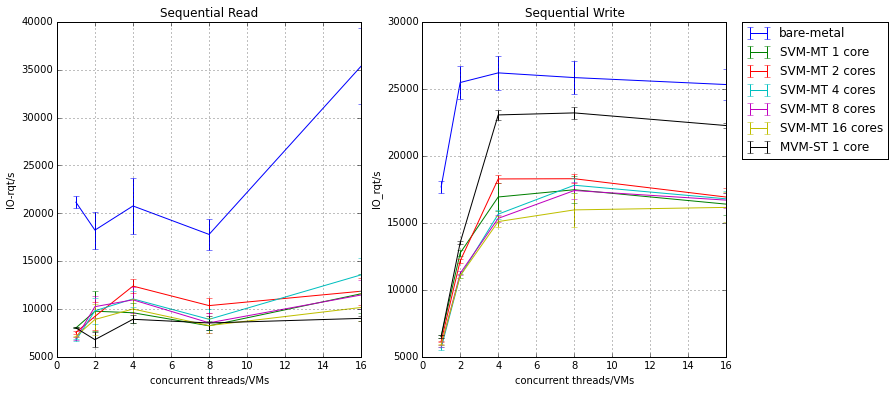

In [37]:
dtresult = pd.read_csv('data/iops16p4gbf12cache_deadline_sync.csv', delimiter=' ', header=None)
dtdata = dtresult[range(1,17)]
dtindex = dtresult[0]
dtdata.index = dtindex.str.replace('T[0-2][0-9]', '',case=False)

# Calculate aggregated context switching on each host of each test, then taking the average
aggiopsin1test = dtdata.T.sum() # Aggregate throughput on each host in one test
avgaggiopsintestgrouped = aggiopsin1test.groupby(level=0)
avgaggiopsin5tests = avgaggiopsintestgrouped.mean() # Then calculate the average of the total CS through 5 tests
ciaggiopsin5tests = avgaggiopsintestgrouped.aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # Confident interval of 95%

# Putting average aggregate throughput to vector before plotting
aggiopssrbf = avgaggiopsin5tests.filter(regex="^SRBF32CTH").tolist()
aggiopsswbf = avgaggiopsin5tests.filter(regex="^SWBF32CTH").tolist()
aggiopssrsvm1c = avgaggiopsin5tests.filter(regex="^SR01VM01CTH").tolist()
aggiopsswsvm1c = avgaggiopsin5tests.filter(regex="^SW01VM01CTH").tolist()
aggiopssrsvm2c = avgaggiopsin5tests.filter(regex="^SR01VM02CTH").tolist()
aggiopsswsvm2c = avgaggiopsin5tests.filter(regex="^SW01VM02CTH").tolist()
aggiopssrsvm4c = avgaggiopsin5tests.filter(regex="^SR01VM04CTH").tolist()
aggiopsswsvm4c = avgaggiopsin5tests.filter(regex="^SW01VM04CTH").tolist()
aggiopssrsvm8c = avgaggiopsin5tests.filter(regex="^SR01VM08CTH").tolist()
aggiopsswsvm8c = avgaggiopsin5tests.filter(regex="^SW01VM08CTH").tolist()
aggiopssrsvm16c = avgaggiopsin5tests.filter(regex="^SR01VM16CTH").tolist()
aggiopsswsvm16c = avgaggiopsin5tests.filter(regex="^SW01VM16CTH").tolist()
aggiopssrmvm = avgaggiopsin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
aggiopsswmvm = avgaggiopsin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()

# Confidence Interval
ciaggiopssrbf = ciaggiopsin5tests.filter(regex="^SRBF32CTH").tolist()
ciaggiopsswbf = ciaggiopsin5tests.filter(regex="^SWBF32CTH").tolist()
ciaggiopssrsvm1c = ciaggiopsin5tests.filter(regex="^SR01VM01CTH").tolist()
ciaggiopsswsvm1c = ciaggiopsin5tests.filter(regex="^SW01VM01CTH").tolist()
ciaggiopssrsvm2c = ciaggiopsin5tests.filter(regex="^SR01VM02CTH").tolist()
ciaggiopsswsvm2c = ciaggiopsin5tests.filter(regex="^SW01VM02CTH").tolist()
ciaggiopssrsvm4c = ciaggiopsin5tests.filter(regex="^SR01VM04CTH").tolist()
ciaggiopsswsvm4c = ciaggiopsin5tests.filter(regex="^SW01VM04CTH").tolist()
ciaggiopssrsvm8c = ciaggiopsin5tests.filter(regex="^SR01VM08CTH").tolist()
ciaggiopsswsvm8c = ciaggiopsin5tests.filter(regex="^SW01VM08CTH").tolist()
ciaggiopssrsvm16c = ciaggiopsin5tests.filter(regex="^SR01VM16CTH").tolist()
ciaggiopsswsvm16c = ciaggiopsin5tests.filter(regex="^SW01VM16CTH").tolist()
ciaggiopssrmvm = ciaggiopsin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
ciaggiopsswmvm = ciaggiopsin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()

x_axis = [1,2,4,8,16]
pylab.rcParams['figure.figsize'] = 12, 6  # change default size of figures

plt.subplot(121)
plt.errorbar(x_axis, aggiopssrbf, ciaggiopssrbf)
plt.errorbar(x_axis, aggiopssrsvm1c, ciaggiopssrsvm1c)
plt.errorbar(x_axis, aggiopssrsvm2c, ciaggiopssrsvm2c)
plt.errorbar(x_axis, aggiopssrsvm4c, ciaggiopssrsvm4c)
plt.errorbar(x_axis, aggiopssrsvm8c, ciaggiopssrsvm8c)
plt.errorbar(x_axis, aggiopssrsvm16c, ciaggiopssrsvm16c)
plt.errorbar(x_axis, aggiopssrmvm, ciaggiopssrmvm)
#plt.axis([0.9, 16.1, 0, 28000])
plt.grid(True)
plt.title('Sequential Read')
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('IO-rqt/s')

plt.subplot(122)
plt.errorbar(x_axis, aggiopsswbf, ciaggiopsswbf, label = 'bare-metal')
plt.errorbar(x_axis, aggiopsswsvm1c, ciaggiopsswsvm1c, label = 'SVM-MT 1 core')
plt.errorbar(x_axis, aggiopsswsvm2c, ciaggiopsswsvm2c, label = 'SVM-MT 2 cores')
plt.errorbar(x_axis, aggiopsswsvm4c, ciaggiopsswsvm4c, label = 'SVM-MT 4 cores')
plt.errorbar(x_axis, aggiopsswsvm8c, ciaggiopsswsvm8c, label = 'SVM-MT 8 cores')
plt.errorbar(x_axis, aggiopsswsvm16c, ciaggiopsswsvm16c, label = 'SVM-MT 16 cores')
plt.errorbar(x_axis, aggiopsswmvm, ciaggiopsswmvm, label = 'MVM-ST 1 core')
#plt.axis([0.9, 16.1, 0, 28000])
plt.grid(True)
plt.title('Sequential Write')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('IO_rqt/s')

#plt.savefig('throughput16procs.pdf')

## Latencies

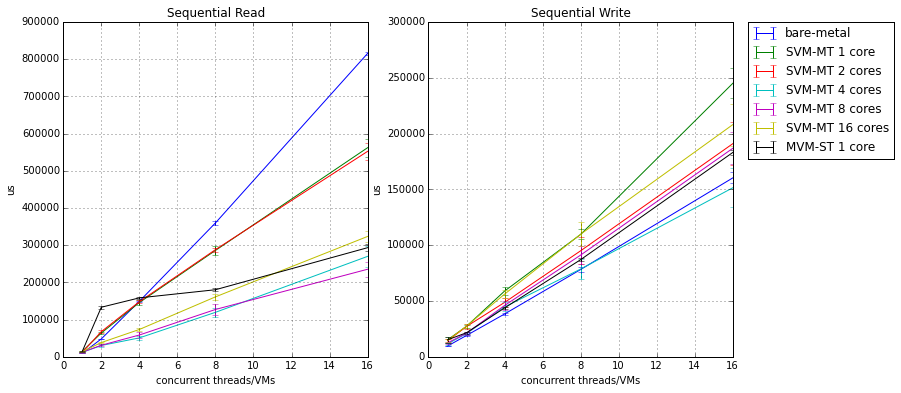

In [38]:
dtresult = pd.read_csv('data/lat16p4gbf12cache_deadline_v2.csv', delimiter=' ', header=None)
dtdata = dtresult[range(1,17)]
dtindex = dtresult[0]
dtdata.index = dtindex.str.replace('T[0-2][0-9]', '',case=False)

# mean of all member in diferent group = mean of group mean when all groups have same number of member
# Calculate aggregated context switching on each host of each test, then taking the average
latin1test = dtdata.T.mean()
avglatintestgrouped = latin1test.groupby(level=0)
avglatin5tests = avglatintestgrouped.aggregate(np.mean) # Then calculate the average of the total CS through 5 tests
cilatin5tests = avglatintestgrouped.aggregate(lambda x: np.std(x) / np.sqrt(x.count()) * 1.96) # Confident interval of 95%

# Putting average aggregate throughput to vector before plotting
latsrbf = avglatin5tests.filter(regex="^SRBF32CTH").tolist()
latswbf = avglatin5tests.filter(regex="^SWBF32CTH").tolist()
latsrsvm1c = avglatin5tests.filter(regex="^SR01VM01CTH").tolist()
latswsvm1c = avglatin5tests.filter(regex="^SW01VM01CTH").tolist()
latsrsvm2c = avglatin5tests.filter(regex="^SR01VM02CTH").tolist()
latswsvm2c = avglatin5tests.filter(regex="^SW01VM02CTH").tolist()
latsrsvm4c = avglatin5tests.filter(regex="^SR01VM04CTH").tolist()
latswsvm4c = avglatin5tests.filter(regex="^SW01VM04CTH").tolist()
latsrsvm8c = avglatin5tests.filter(regex="^SR01VM08CTH").tolist()
latswsvm8c = avglatin5tests.filter(regex="^SW01VM08CTH").tolist()
latsrsvm16c = avglatin5tests.filter(regex="^SR01VM16CTH").tolist()
latswsvm16c = avglatin5tests.filter(regex="^SW01VM16CTH").tolist()
latsrmvm = avglatin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
latswmvm = avglatin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()

# Confidence Interval
cilatsrbf = cilatin5tests.filter(regex="^SRBF32CTH").tolist()
cilatswbf = cilatin5tests.filter(regex="^SWBF32CTH").tolist()
cilatsrsvm1c = cilatin5tests.filter(regex="^SR01VM01CTH").tolist()
cilatswsvm1c = cilatin5tests.filter(regex="^SW01VM01CTH").tolist()
cilatsrsvm2c = cilatin5tests.filter(regex="^SR01VM02CTH").tolist()
cilatswsvm2c = cilatin5tests.filter(regex="^SW01VM02CTH").tolist()
cilatsrsvm4c = cilatin5tests.filter(regex="^SR01VM04CTH").tolist()
cilatswsvm4c = cilatin5tests.filter(regex="^SW01VM04CTH").tolist()
cilatsrsvm8c = cilatin5tests.filter(regex="^SR01VM08CTH").tolist()
cilatswsvm8c = cilatin5tests.filter(regex="^SW01VM08CTH").tolist()
cilatsrsvm16c = cilatin5tests.filter(regex="^SR01VM16CTH").tolist()
cilatswsvm16c = cilatin5tests.filter(regex="^SW01VM16CTH").tolist()
cilatsrmvm = cilatin5tests.filter(regex="^SR[0-9]+VM01CTH01").tolist()
cilatswmvm = cilatin5tests.filter(regex="^SW[0-9]+VM01CTH01").tolist()

x_axis = [1,2,4,8,16]
pylab.rcParams['figure.figsize'] = 12, 6  # change default size of figures

plt.subplot(121)
plt.errorbar(x_axis, latsrbf, cilatsrbf)
plt.errorbar(x_axis, latsrsvm1c, cilatsrsvm1c)
plt.errorbar(x_axis, latsrsvm2c, cilatsrsvm2c)
plt.errorbar(x_axis, latsrsvm4c, cilatsrsvm4c)
plt.errorbar(x_axis, latsrsvm8c, cilatsrsvm8c)
plt.errorbar(x_axis, latsrsvm16c, cilatsrsvm16c)
plt.errorbar(x_axis, latsrmvm, cilatsrmvm)
#plt.axis([0.9, 16.1, 0, 28000])
plt.grid(True)
plt.title('Sequential Read')
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('us')

plt.subplot(122)
plt.errorbar(x_axis, latswbf, cilatswbf, label = 'bare-metal')
plt.errorbar(x_axis, latswsvm1c, cilatswsvm1c, label = 'SVM-MT 1 core')
plt.errorbar(x_axis, latswsvm2c, cilatswsvm2c, label = 'SVM-MT 2 cores')
plt.errorbar(x_axis, latswsvm4c, cilatswsvm4c, label = 'SVM-MT 4 cores')
plt.errorbar(x_axis, latswsvm8c, cilatswsvm8c, label = 'SVM-MT 8 cores')
plt.errorbar(x_axis, latswsvm16c, cilatswsvm16c, label = 'SVM-MT 16 cores')
plt.errorbar(x_axis, latswmvm, cilatswmvm, label = 'MVM-ST 1 core')
#plt.axis([0.9, 16.1, 0, 28000])
plt.grid(True)
plt.title('Sequential Write')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
pylab.xlabel('concurrent threads/VMs')
pylab.ylabel('us')

#plt.savefig('throughput16procs.pdf')

## Disk Utilization

Disk was used by 100% in all cases.